In [1]:
import numpy
import itertools
import matplotlib.pyplot as plt
import matplotlib.patches as ptchs

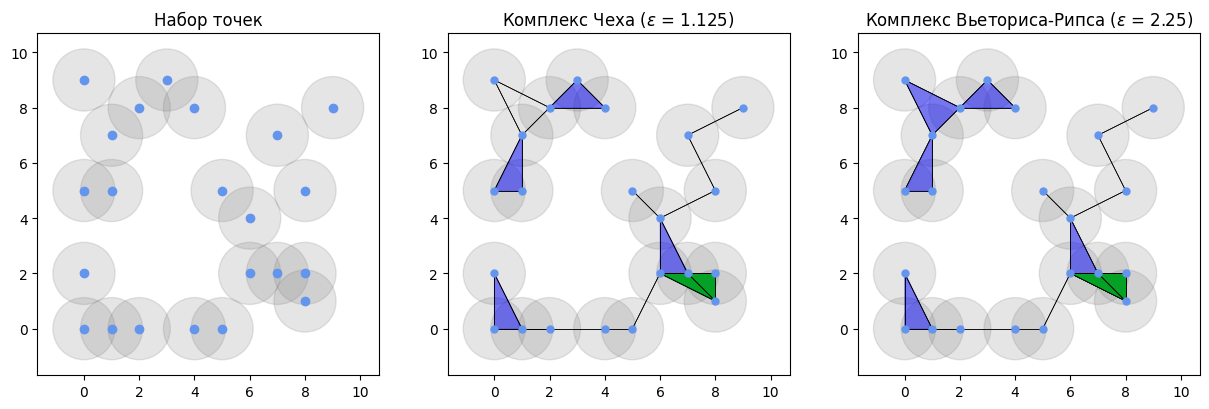

In [10]:
eps = 1.125
numpy.random.seed(6876)
homology_dimensions = [ 3, 4, 5, 2, 1 ]

points = numpy.random.randint(0, 10, (25, 2))
points = numpy.unique(points, axis = 0)
fig, axes = plt.subplots(1, 3, figsize = (15, 5))

def setup_axis(ax, points):
    ax.set_aspect('equal')
    for (x, y) in points:
        ax.add_patch(ptchs.Circle((x, y), eps, color = 'gray', alpha = 0.2))
    ax.scatter(points[:, 0], points[:, 1], alpha = 0)

def draw_simplex(ax, points):
    colors = [ None, 'cornflowerblue', 'black', (0, 0, 1, 0.1), (0, 0.75, 0, 0.1) ]
    color = colors[len(points)]
    if len(points) == 1:
        ax.scatter(points[0][0], points[0][1], 25, color = color)
    else:
        for pts in itertools.permutations(points):
            ax.add_patch(ptchs.Polygon(pts, color = color, linewidth = 0.5))


setup_axis(axes[0], points)
axes[0].set_title('Набор точек')
axes[0].scatter(points[:, 0], points[:, 1], color = 'cornflowerblue')


setup_axis(axes[1], points)
axes[1].set_title(f'Комплекс Чеха ($\epsilon$ = {eps})')
for dim in homology_dimensions:
    for pts in itertools.combinations(points, dim):
        pts = numpy.array(pts)
        xmin, xmax = numpy.min(pts[:, 0]), numpy.max(pts[:, 0])
        ymin, ymax = numpy.min(pts[:, 1]), numpy.max(pts[:, 1])
        if (xmax - xmin > 2 * eps) or (ymax - ymin > 2 * eps): continue
        x_range = numpy.arange(xmin - eps, xmax + eps, 0.01)
        y_range = numpy.arange(ymin - eps, ymax + eps, 0.01)
        for (c_x, c_y) in itertools.product(x_range, y_range):
            x_dist = (pts[:, 0] - c_x) ** 2
            y_dist = (pts[:, 1] - c_y) ** 2
            is_ok = (x_dist + y_dist) <= (eps ** 2)
            if (is_ok.all()):
                draw_simplex(axes[1], pts)
                break


setup_axis(axes[2], points)
axes[2].set_title(f'Комплекс Вьеториса-Рипса ($\epsilon$ = {2 * eps})')
for dim in homology_dimensions:
    for pts in itertools.combinations(points, dim):
        is_simplex = True
        for (x1, y1), (x2, y2) in itertools.product(pts, pts):
            dist = (x2 - x1) ** 2 + (y2 - y1) ** 2
            if dist > (2 * eps) ** 2:
                is_simplex = False
                break
        if is_simplex: draw_simplex(axes[2], pts)

fig.savefig(f"report/complexes.svg")
fig.savefig(f"report/complexes.png")

Opening raw data file Subj1/src/data_rr_filt-raw.fif...
    Range : 3500 ... 471000 =      7.000 ...   942.000 secs
Ready.
Reading /Users/ttpo100ajiex/Desktop/HSE/CourseProject/Subj1/src/epochs_filt_rr-epo.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
1046 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
935 matching events found
No baseline correction applied
0 projection items activated
Loading data for 935 events and 501 original time points ...
0 bad epochs dropped
(935, 40, 501)
[9.9, 89.9, 146.7, 264.3, 456.3, 513.1, 621.1, 708.3, 772.3, 877.9, 938.7]
(935, 40)


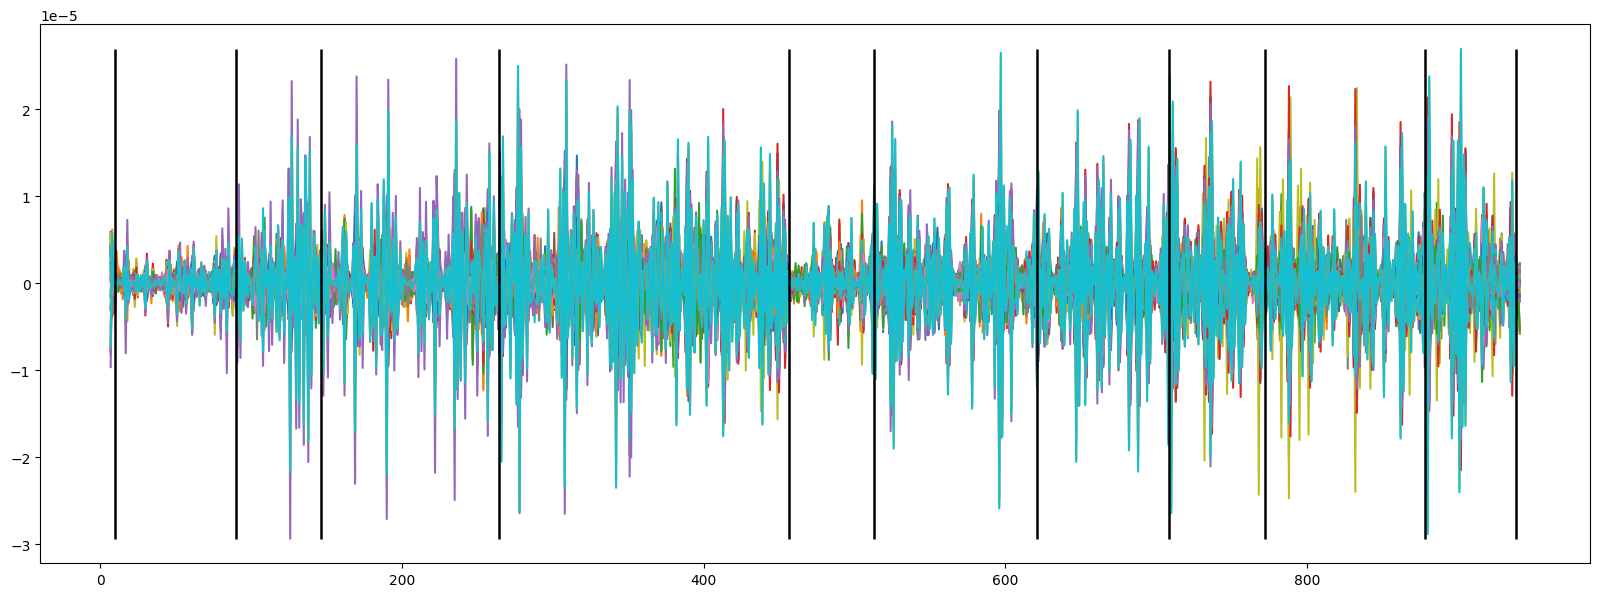

In [152]:
import mne
import numpy

eeg = mne.io.read_raw_fif("Subj1/src/data_rr_filt-raw.fif")
src_epochs = mne.read_epochs("Subj1/src/epochs_filt_rr-epo.fif")

fix_1s_events_rr = mne.make_fixed_length_events(eeg, duration = 1)
kwargs = dict(baseline = None, tmin = 0, tmax = 1, preload = True)
epochs = mne.Epochs(eeg, fix_1s_events_rr.astype(int), **kwargs)
print(epochs.get_data(copy = True).shape)

edges_sec = [ ]
for edge in [ 0, 92, 154, 282, 492, 560, 682, 784, 857, 976, 1045 ]:
    edges_sec.append(src_epochs.events[edge][0] / src_epochs.info['sfreq'])
print(edges_sec)

data = numpy.average(epochs.get_data(copy = True), axis = 2)
print(data.shape)

plt.rcParams['figure.figsize'] = (20, 7)
for i in range(0, data.shape[1]): plt.plot(epochs.events[:, 0] / epochs.info['sfreq'], data[:, i])
plt.vlines(x = edges_sec, ymin = numpy.min(data), ymax = numpy.max(data), color = 'black', linewidth = 1.8)
plt.show()